In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/salaries.csv')
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [4]:
input = df.drop('salary_more_then_100k', axis='columns')
output = df['salary_more_then_100k']

In [5]:
le_company, le_job, le_degree = LabelEncoder(), LabelEncoder(), LabelEncoder()

In [6]:
input['company'] = le_company.fit_transform(input['company'])
input['degree'] = le_degree.fit_transform(input['degree'])
input['job'] = le_job.fit_transform(input['job'])
input

,company,job,degree
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [8]:
model = tree.DecisionTreeClassifier(criterion="gini")
model.fit(input, output)

DecisionTreeClassifier()

In [9]:
data = {
    'company': [2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
    'job': [2, 2, 0, 0, 1, 1, 2, 1, 0, 0, 2, 2, 0, 0, 1, 1],
    'degree': [0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1]
}
labels = [0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
X_test = pd.DataFrame(data)
y_test = pd.Series(labels)
y_pred = model.score(X_test, y_test)
y_pred

1.0

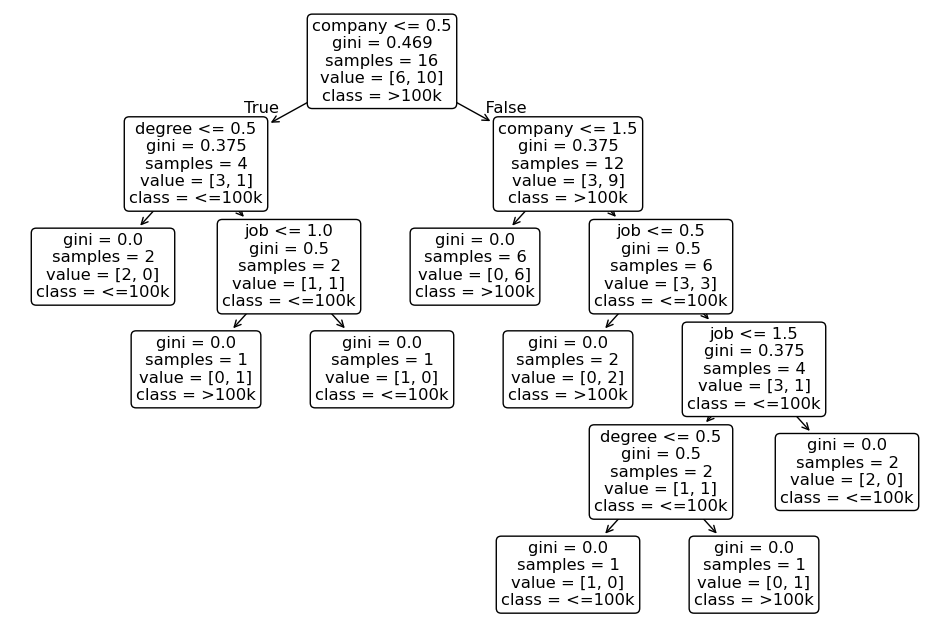

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
tree.plot_tree(model, feature_names=input.columns, class_names=['<=100k', '>100k'], filled=False, impurity=True, rounded=True)
plt.show()